<a href="https://colab.research.google.com/github/gabyspina/Backend/blob/main/Viajes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Valores faltantes por columna:
 Series([], dtype: int64)


<Figure size 800x500 with 0 Axes>

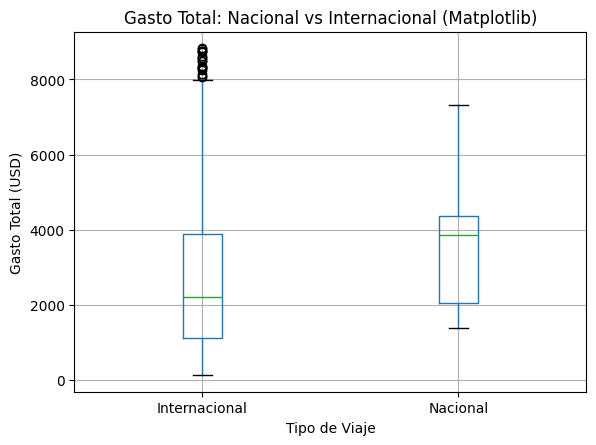

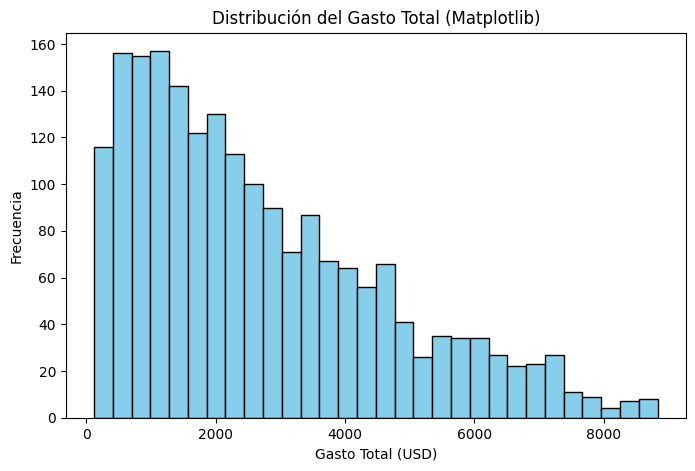

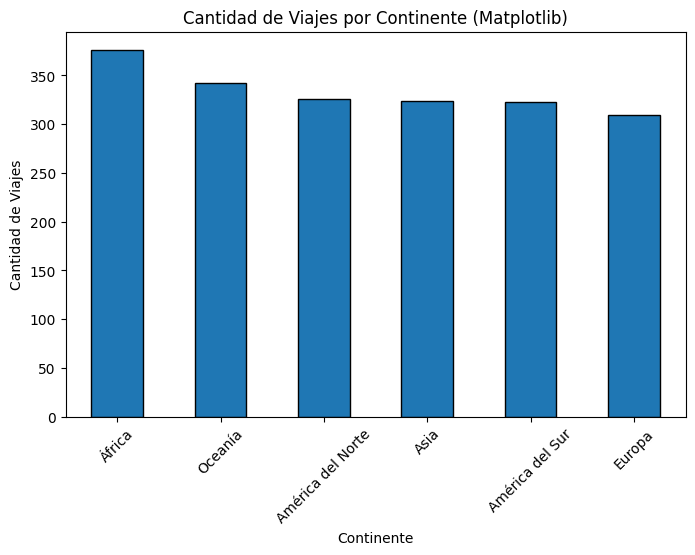

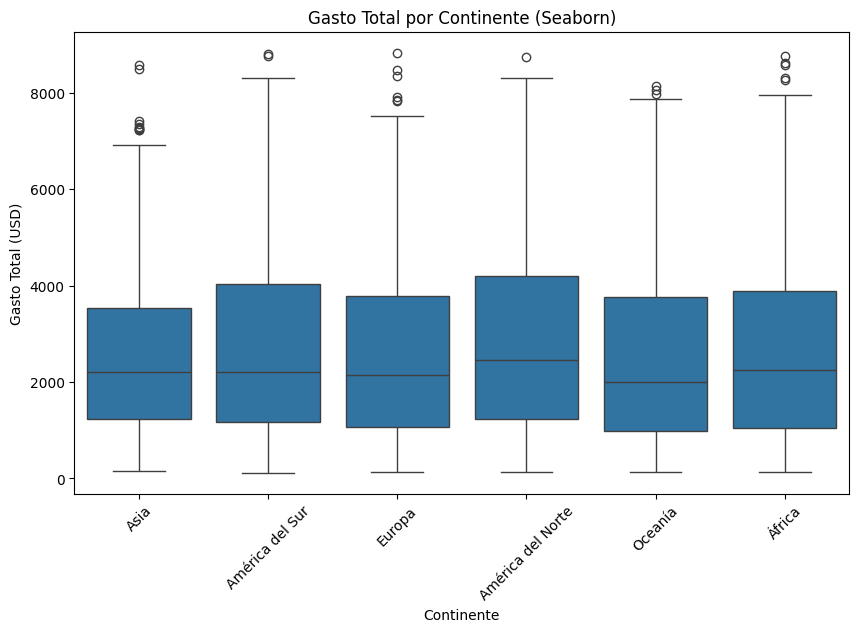

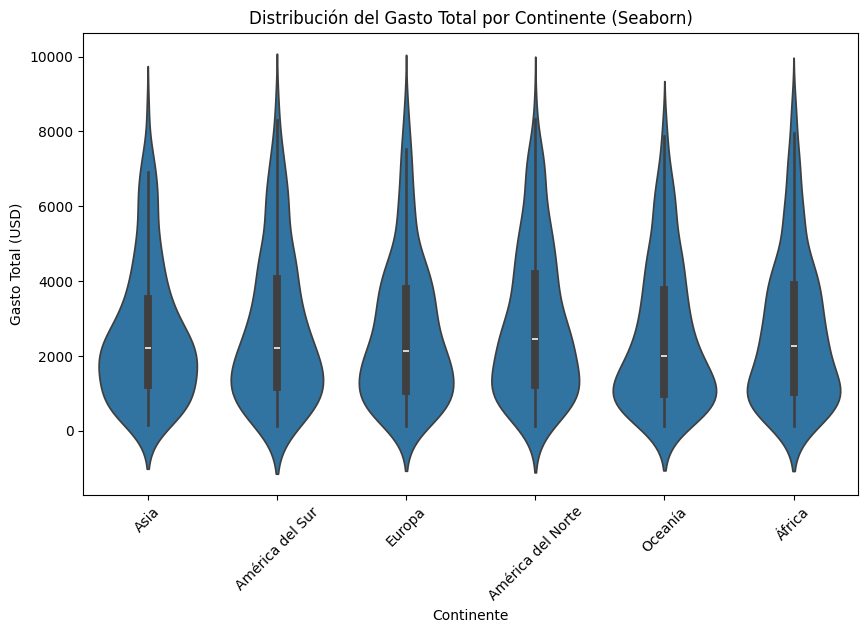

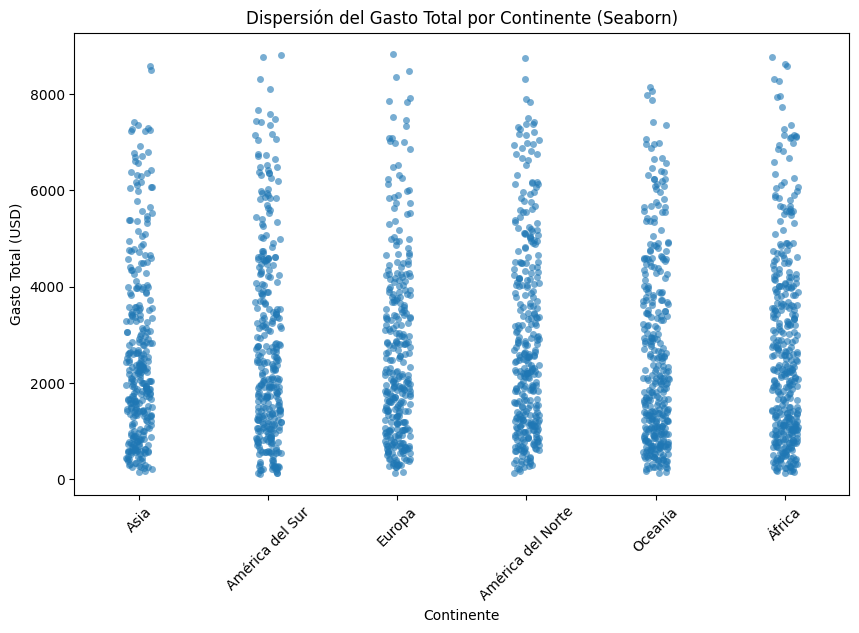

In [1]:
# Proyecto Final Parte I - Gaby Spina
# Desafío: Visualizaciones en Python

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos directamente desde Google Sheets
sheet_url = "https://docs.google.com/spreadsheets/d/1djWgCfqYbZfhEaQNlBVjg79kFDhaECBHEUyGz3ctMxw/export?format=csv"
df = pd.read_csv(sheet_url)

# Crear columna: Viaje_Internacional (Sí/No)
df["Viaje_Internacional"] = df["País_Origen"] != df["País_Destino"]
df["Tipo_Viaje"] = df["Viaje_Internacional"].map({True: "Internacional", False: "Nacional"})

# Crear columna: Gasto_Total = Presupuesto diario * Duración
df["Gasto_Total"] = df["Presupuesto_Diario_USD"] * df["Duración_Viaje_Días"]

# Diagnóstico de valores perdidos
missing = df.isnull().sum()
print("\nValores faltantes por columna:\n", missing[missing > 0])

# ----------- VISUALIZACIONES ----------- #

# 1. Matplotlib - Boxplot Gasto Total Nacional vs Internacional
plt.figure(figsize=(8,5))
df.boxplot(column="Gasto_Total", by="Tipo_Viaje")
plt.title("Gasto Total: Nacional vs Internacional (Matplotlib)")
plt.suptitle("")
plt.xlabel("Tipo de Viaje")
plt.ylabel("Gasto Total (USD)")
plt.show()

# 2. Matplotlib - Histograma del gasto total
plt.figure(figsize=(8,5))
plt.hist(df["Gasto_Total"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribución del Gasto Total (Matplotlib)")
plt.xlabel("Gasto Total (USD)")
plt.ylabel("Frecuencia")
plt.show()

# 3. Matplotlib - Barras: cantidad de viajes por continente
viajes_continente = df["Continente"].value_counts()
plt.figure(figsize=(8,5))
viajes_continente.plot(kind='bar', edgecolor='black')
plt.title("Cantidad de Viajes por Continente (Matplotlib)")
plt.xlabel("Continente")
plt.ylabel("Cantidad de Viajes")
plt.xticks(rotation=45)
plt.show()

# 4. Seaborn - Boxplot Gasto Total por Continente
plt.figure(figsize=(10,6))
sns.boxplot(x="Continente", y="Gasto_Total", data=df)
plt.title("Gasto Total por Continente (Seaborn)")
plt.xlabel("Continente")
plt.ylabel("Gasto Total (USD)")
plt.xticks(rotation=45)
plt.show()

# 5. Seaborn - Violinplot Gasto Total por Continente
plt.figure(figsize=(10,6))
sns.violinplot(x="Continente", y="Gasto_Total", data=df)
plt.title("Distribución del Gasto Total por Continente (Seaborn)")
plt.xlabel("Continente")
plt.ylabel("Gasto Total (USD)")
plt.xticks(rotation=45)
plt.show()

# 6. Seaborn - Stripplot Gasto Total por Continente
plt.figure(figsize=(10,6))
sns.stripplot(x="Continente", y="Gasto_Total", data=df, jitter=True, alpha=0.6)
plt.title("Dispersión del Gasto Total por Continente (Seaborn)")
plt.xlabel("Continente")
plt.ylabel("Gasto Total (USD)")
plt.xticks(rotation=45)
plt.show()
